In [3]:
import numpy as np
import pandas as pd
import os
from re import search
import shutil
import natsort
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2

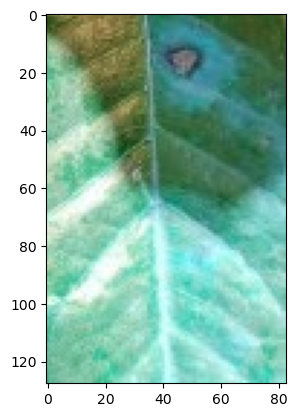

In [4]:
Train_DIR=r'C:\Users\Anudeep K S\Downloads\coffee dataset\train'
Categories=['cerscospora','healthy','miner','rust']

for j in Categories:
    path=os.path.join(Train_DIR,j)
    for img in os.listdir(path):
        old_image=cv2.imread(os.path.join(path,img),cv2.COLOR_BGR2RGB)
        plt.imshow(old_image)
        plt.show()
        break
    break

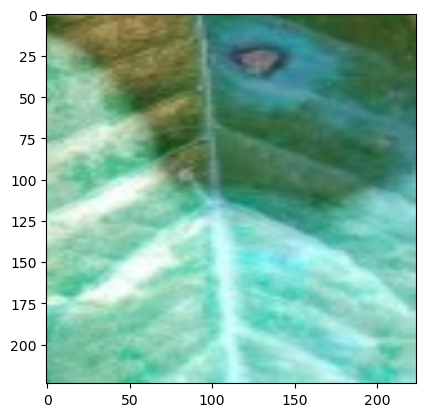

In [5]:
IMG_SIZE=224
new_image=cv2.resize(old_image,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_image)
plt.show()

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Activation,Flatten, Conv2D, MaxPooling2D

In [6]:
datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                vertical_flip=True,
                                validation_split=0.2)


train_datagen=datagen.flow_from_directory(r'C:\Users\Anudeep K S\Downloads\coffee dataset\train',
                                         target_size=(IMG_SIZE,IMG_SIZE),
                                         batch_size=16,
                                         class_mode='categorical',
                                         subset='training')

val_datagen=datagen.flow_from_directory(r'C:\Users\Anudeep K S\Downloads\coffee dataset\train',
                                         target_size=(IMG_SIZE,IMG_SIZE),
                                         batch_size=16,
                                         class_mode='categorical',
                                         subset='validation')

Found 2160 images belonging to 4 classes.
Found 540 images belonging to 4 classes.


In [7]:
model=Sequential()
model.add(Conv2D(64,(3,3),activation='relu',padding='same',input_shape=(IMG_SIZE,IMG_SIZE,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(4,activation='softmax'))

# Compile the Model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [8]:
checkpoint=ModelCheckpoint(r'C:\Users\Anudeep K S\Downloads\coffee dataset\coffee.h5',
                          monitor='val_loss',
                          mode='min',
                          save_best_only=True,
                          verbose=1)
earlystop=EarlyStopping(monitor='val_loss',
                       min_delta=0,
                       patience=10,
                       verbose=1,
                       restore_best_weights=True)

callbacks=[checkpoint,earlystop]

In [9]:
model_history=model.fit_generator(train_datagen,validation_data=val_datagen,
                                 epochs=30,
                                 steps_per_epoch=train_datagen.samples//16,
                                 validation_steps=val_datagen.samples//16,
                                 callbacks=callbacks)

C:\Users\Anudeep K S\AppData\Local\Temp\ipykernel_36376\1407545075.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history=model.fit_generator(train_datagen,validation_data=val_datagen,


Epoch 1/30
135/135 [==============================] - ETA: 0s - loss: 0.6069 - accuracy: 0.7750
Epoch 1: val_loss improved from inf to 0.75942, saving model to C:\Users\Anudeep K S\Downloads\coffee dataset\coffee.h5
135/135 [==============================] - 203s 1s/step - loss: 0.6069 - accuracy: 0.7750 - val_loss: 0.7594 - val_accuracy: 0.7708
Epoch 2/30
135/135 [==============================] - ETA: 0s - loss: 0.2862 - accuracy: 0.8986
Epoch 2: val_loss improved from 0.75942 to 0.28547, saving model to C:\Users\Anudeep K S\Downloads\coffee dataset\coffee.h5
135/135 [==============================] - 190s 1s/step - loss: 0.2862 - accuracy: 0.8986 - val_loss: 0.2855 - val_accuracy: 0.8731
Epoch 3/30
135/135 [==============================] - ETA: 0s - loss: 0.1840 - accuracy: 0.9463
Epoch 3: val_loss improved from 0.28547 to 0.10217, saving model to C:\Users\Anudeep K S\Downloads\coffee dataset\coffee.h5
135/135 [==============================] - 188s 1s/step - loss: 0.1840 - accurac

In [3]:
loss_train=model_history.history['loss']
loss_val=model_history.history['val_loss']
epochs=range(1,22)
plt.plot(epochs,loss_train,'g',label="training loss")
plt.plot(epochs,loss_val,'b',label="training validation")

NameError: name 'model_history' is not defined

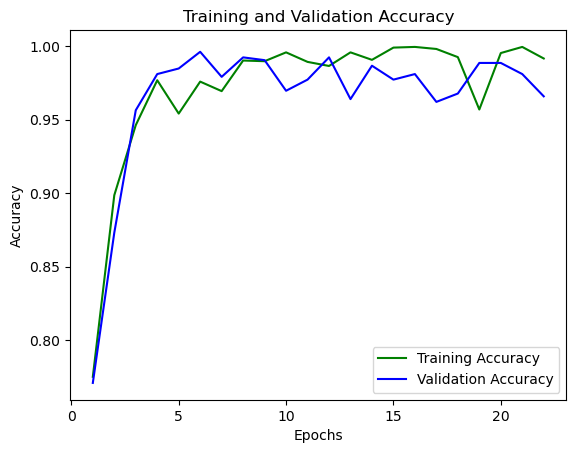

In [30]:
acc_train=model_history.history['accuracy']
acc_val=model_history.history['val_accuracy']
epochs=range(1,23)
plt.plot(epochs,acc_train,'g',label='Training Accuracy')
plt.plot(epochs,acc_val,'b',label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [2]:
import os

folder_path = "C:\Users\Anudeep K S\Downloads\coffee dataset\test\healthy"  


files = os.listdir(folder_path)


num_files = len(files)

print("Number of files in folder:", num_files)

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (2252442998.py, line 3)

<BarContainer object of 2 artists>

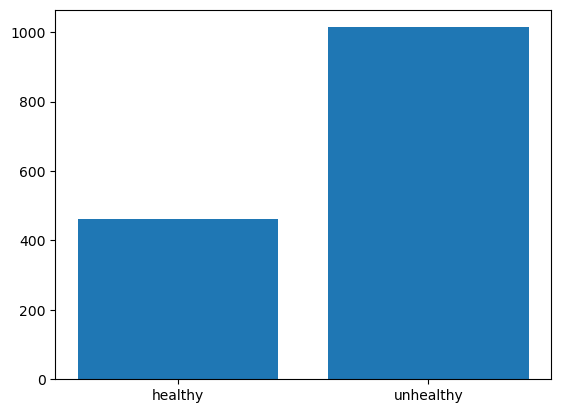

In [8]:
import os
import matplotlib.pyplot as plt

folder_path = r"C:\Users\Anudeep K S\Downloads\coffee dataset\test\healthy"

files = os.listdir(folder_path)

x = len(files)
 
path2 = r"C:\Users\Anudeep K S\Downloads\coffee dataset\test\unhealthy"

files2 = os.listdir(path2)

y=len(files2)

a=[x,y]
b=['healthy','unhealthy']

plt.bar(b,a)

In [6]:

import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import load_img, img_to_array


IMG_SIZE=224

# Load the saved model
model = tf.keras.models.load_model(r'C:\Users\Anudeep K S\Downloads\coffee dataset\coffee.h5')

# Define the test data directory
test_dir = r'C:\Users\Anudeep K S\Downloads\coffee dataset\test'

# Define the class labels
class_labels = ['healthy', 'unhealthy']

# Initialize lists to store true and predicted labels
true_labels = []
predicted_labels = []

# Iterate over the class labels and test images
for label in class_labels:
    folder_path = os.path.join(test_dir, label)
    files = os.listdir(folder_path)
    
    for file in files:
        img_path = os.path.join(folder_path, file)
        image = load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
        image = img_to_array(image) / 255.0
        image = np.expand_dims(image, axis=0)
        
        # Predict the class label
        prediction = model.predict(image)
        predicted_label = class_labels[np.argmax(prediction)]
        
        # Append true and predicted labels
        true_labels.append(label)
        predicted_labels.append(predicted_label)

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix as a graph
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Increase font size for better visibility
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()




1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 37ms/step


IndexError: list index out of range